<a href="https://colab.research.google.com/github/prathammehta16/Training_CustomDataset_On_YoloV5/blob/main/Yolov5_Raccoon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  

Cloning into 'yolov5'...
remote: Enumerating objects: 12633, done.
remote: Total 12633 (delta 0), reused 0 (delta 0), pack-reused 12633
Receiving objects: 100% (12633/12633), 12.81 MiB | 5.56 MiB/s, done.
Resolving deltas: 100% (8714/8714), done.


In [ ]:
!unzip /content/gdrive/MyDrive/SGP_2022/images2.zip

Archive:  /content/gdrive/MyDrive/SGP_2022/images2.zip
   creating: images2/ANNOTATIONS/
  inflating: images2/ANNOTATIONS/imgA_0.txt  
  inflating: images2/ANNOTATIONS/imgA_1.txt  
  inflating: images2/ANNOTATIONS/imgA_10.txt  
  inflating: images2/ANNOTATIONS/imgA_100.txt  
  inflating: images2/ANNOTATIONS/imgA_101.txt  
  inflating: images2/ANNOTATIONS/imgA_102.txt  
  inflating: images2/ANNOTATIONS/imgA_103.txt  
  inflating: images2/ANNOTATIONS/imgA_104.txt  
  inflating: images2/ANNOTATIONS/imgA_105.txt  
  inflating: images2/ANNOTATIONS/imgA_106.txt  
  inflating: images2/ANNOTATIONS/imgA_107.txt  
  inflating: images2/ANNOTATIONS/imgA_108.txt  
  inflating: images2/ANNOTATIONS/imgA_109.txt  
  inflating: images2/ANNOTATIONS/imgA_11.txt  
  inflating: images2/ANNOTATIONS/imgA_110.txt  
  inflating: images2/ANNOTATIONS/imgA_111.txt  
  inflating: images2/ANNOTATIONS/imgA_112.txt  
  inflating: images2/ANNOTATIONS/imgA_113.txt  
  inflating: images2/ANNOTATIONS/imgA_114.txt  
  inf

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/images2', output="output2", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 3946 files [00:02, 1575.60 files/s]


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
%pip install -qr requirements.txt  

     |████████████████████████████████| 1.6 MB 50.6 MB/s 


In [ ]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v6.2-155-g489920a Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/78.2 GB disk)


In [ ]:
def create_data_directories(data_name):
  Path(f"../datasets/{data_name}/images/train").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/images/valid").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/labels/train").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
  Path(f"../datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)

create_data_directories('Vehicle_data')

In [ ]:
!cat data/vehicle_data.yaml
print ('---------------------------------------------')

train: /content/datasets/Vehicle_data/images/train
val: /content/datasets/Vehicle_data/images/valid
test: /content/datasets/Vehicle_data/images/test

nc: 40
names: ['road', 'parking', 'drivable fallback', 'sidewalk', 'rail track', 'non-drivable fallback', 'person', 'animal', 'rider', 'motorcycle', 'bicycle', 'autorickshaw', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train', 'vehicle fallback', 'curb', 'wall', 'fence', 'guard rail', 'billboard', 'traffic sign', 'traffic light', 'pole', 'polegroup', 'obs-str-bar-fallback', 'building', 'bridge', 'tunnel', 'vegetation', 'sky', 'fallback background', 'unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'license plate']---------------------------------------------


In [ ]:
!python train.py --batch 32 --epochs 150 --data 'data/vehicle_data.yaml' --weights 'yolov5s6.pt' --project 'runs_penguins' --name 'feature_extraction' --cache --freeze 12
#clear_output()

train: weights=yolov5s6.pt, cfg=, data=data/vehicle_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_penguins, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-155-g489920a Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

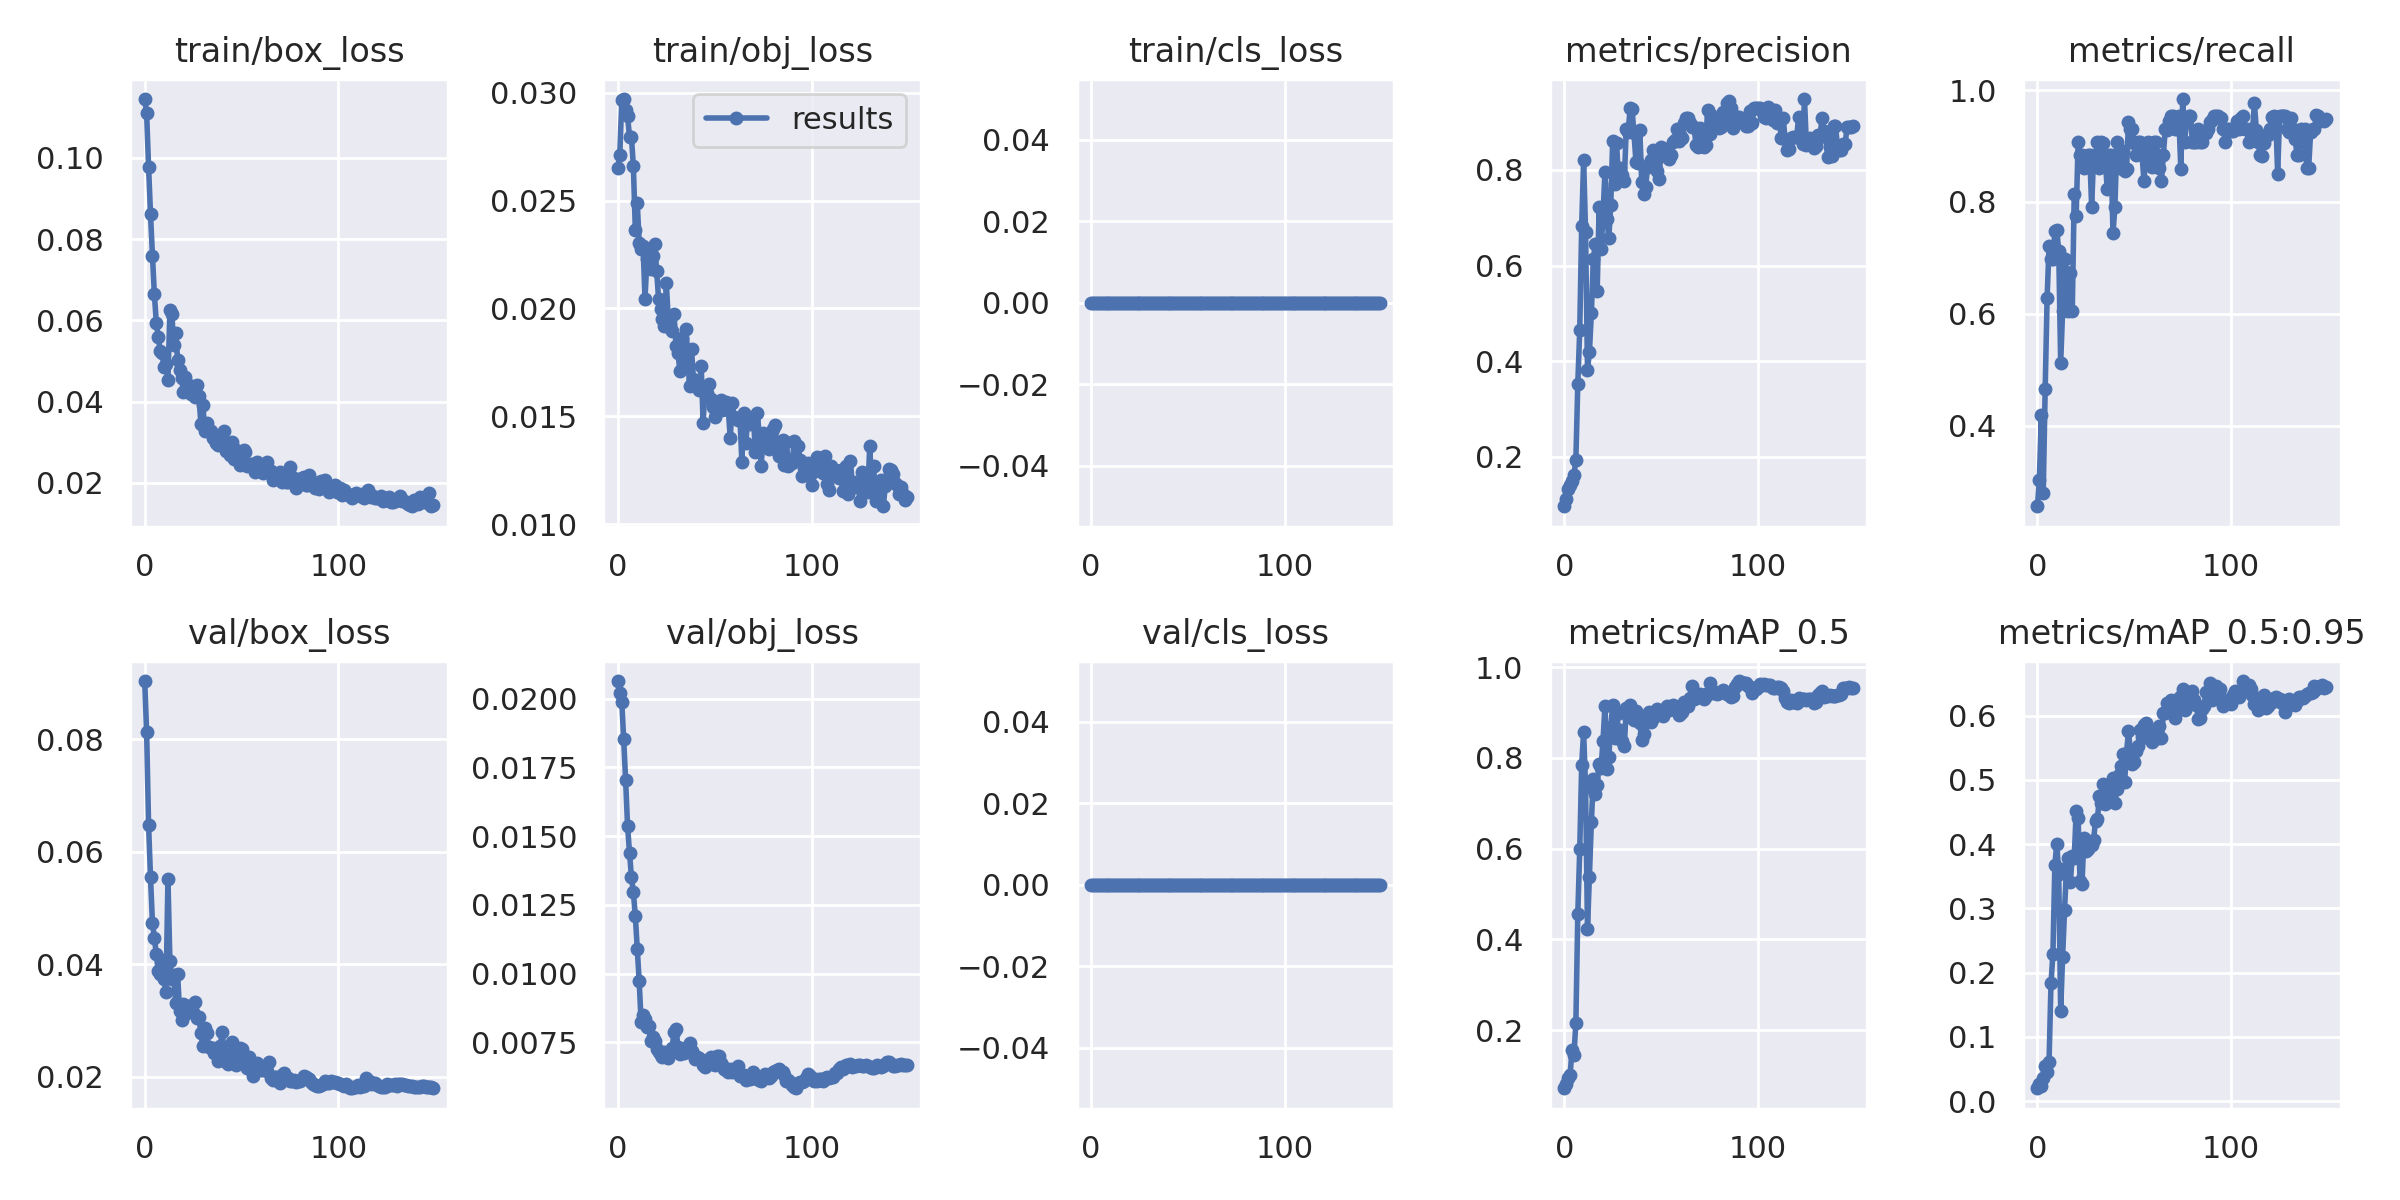

In [ ]:
display.Image(f"runs_penguins/feature_extraction/results.png")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!python train.py --hyp '/content/yolov5/data/hyps/hyp.scratch-low.yaml' --batch 16 --epochs 100 --data 'data/penguin_data.yaml' --weights 'runs_penguins/feature_extraction/weights/best.pt' --project 'runs_penguins' --name 'fine-tuning' --cache
#clear_output()

train: weights=runs_penguins/feature_extraction/weights/best.pt, cfg=, data=data/penguin_data.yaml, hyp=/content/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_penguins, name=fine-tuning, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

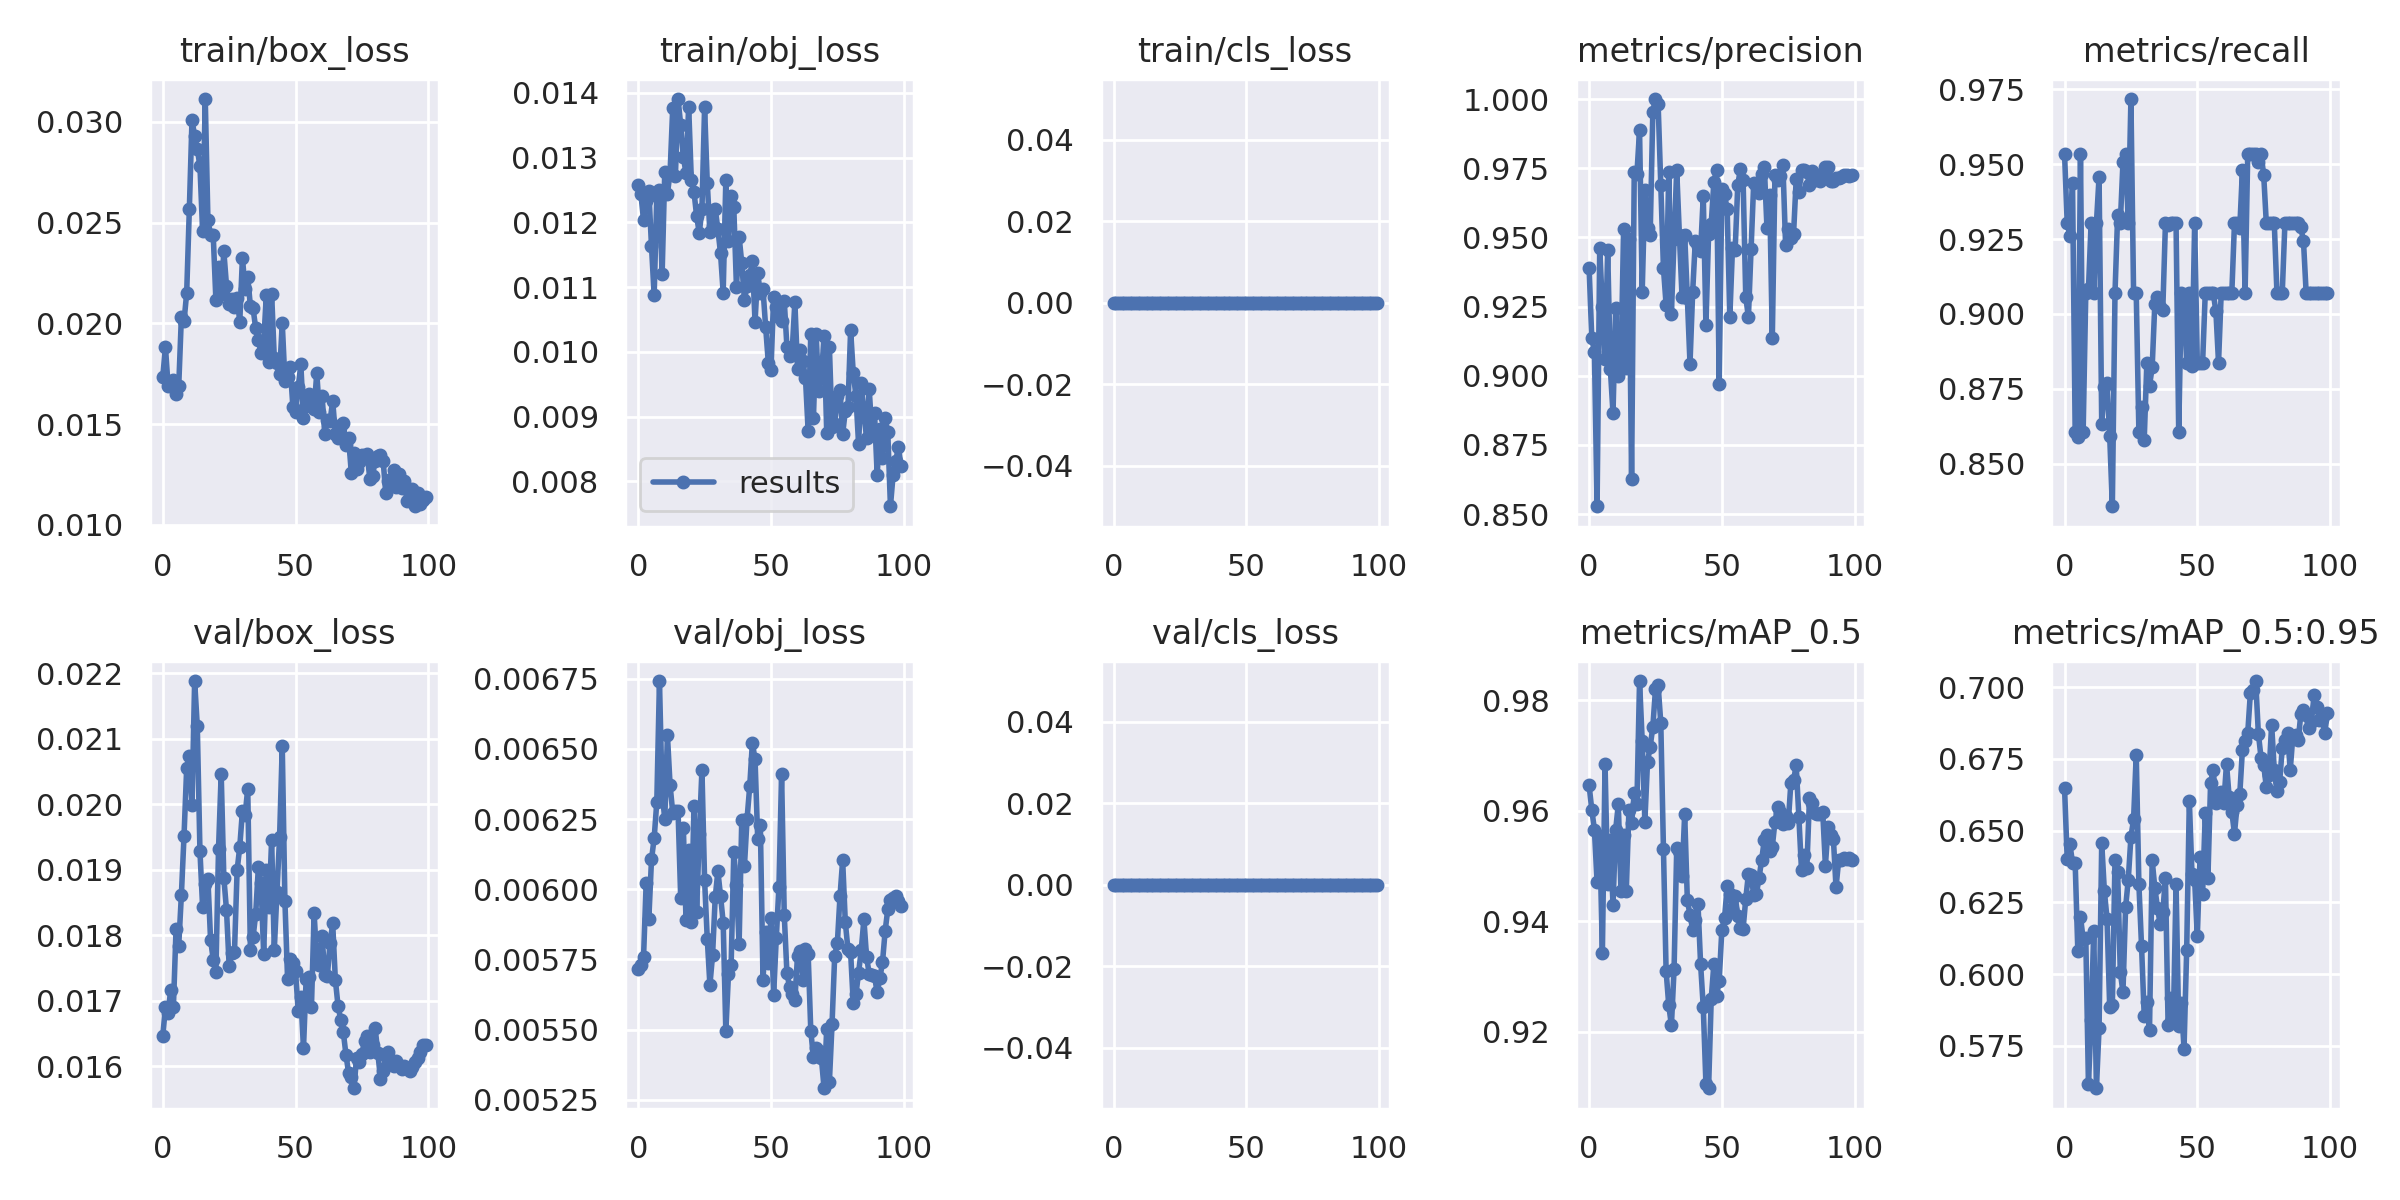

In [ ]:
display.Image(f"runs_penguins/fine-tuning/results.png")

In [ ]:
!python val.py --weights 'runs_penguins/fine-tuning/weights/best.pt' --batch 64 --data 'data/penguin_data.yaml' --task test --project 'runs_penguins' --name 'validation_on_test_data' --augment
#clear_output()

val: data=data/penguin_data.yaml, weights=['runs_penguins/fine-tuning/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs_penguins, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 280 layers, 12308200 parameters, 0 gradients, 16.2 GFLOPs
test: Scanning '/content/datasets/Raccoon_data/labels/test' images and labels...40 found, 0 missing, 0 empty, 0 corrupt: 100% 40/40 [00:00<00:00, 425.86it/s]
test: New cache created: /content/datasets/Raccoon_data/labels/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 1/1 [00:02<00:00,  2.20s/it]
                 all         40         44      0.866      0.884      0.905     

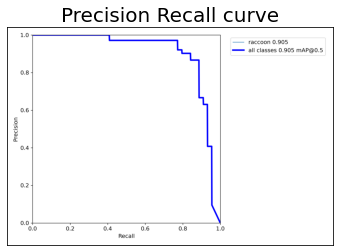

In [ ]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_penguins/validation_on_test_data/PR_curve.png'))

In [ ]:
!python detect.py --weights 'runs_penguins/fine-tuning/weights/best.pt'  --conf 0.6 --source '../datasets/Raccoon_data/images/test' --project 'runs_penguins' --name 'detect_test' --augment --line=3
#clear_output()

detect: weights=['runs_penguins/fine-tuning/weights/best.pt'], source=../datasets/Raccoon_data/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs_penguins, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 280 layers, 12308200 parameters, 0 gradients, 16.2 GFLOPs
image 1/40 /content/datasets/Raccoon_data/images/test/raccoon-161.jpg: 448x640 Done. (0.064s)
image 2/40 /content/datasets/Raccoon_data/images/test/raccoon-162.jpg: 512x640 1 raccoon, Done. (0.058s)
image 3/40 /content/datasets/Raccoon_data/images/test/raccoon-163.jpg: 576x640 1 raccoon, Done. (0.059s)
image 4/40 /content

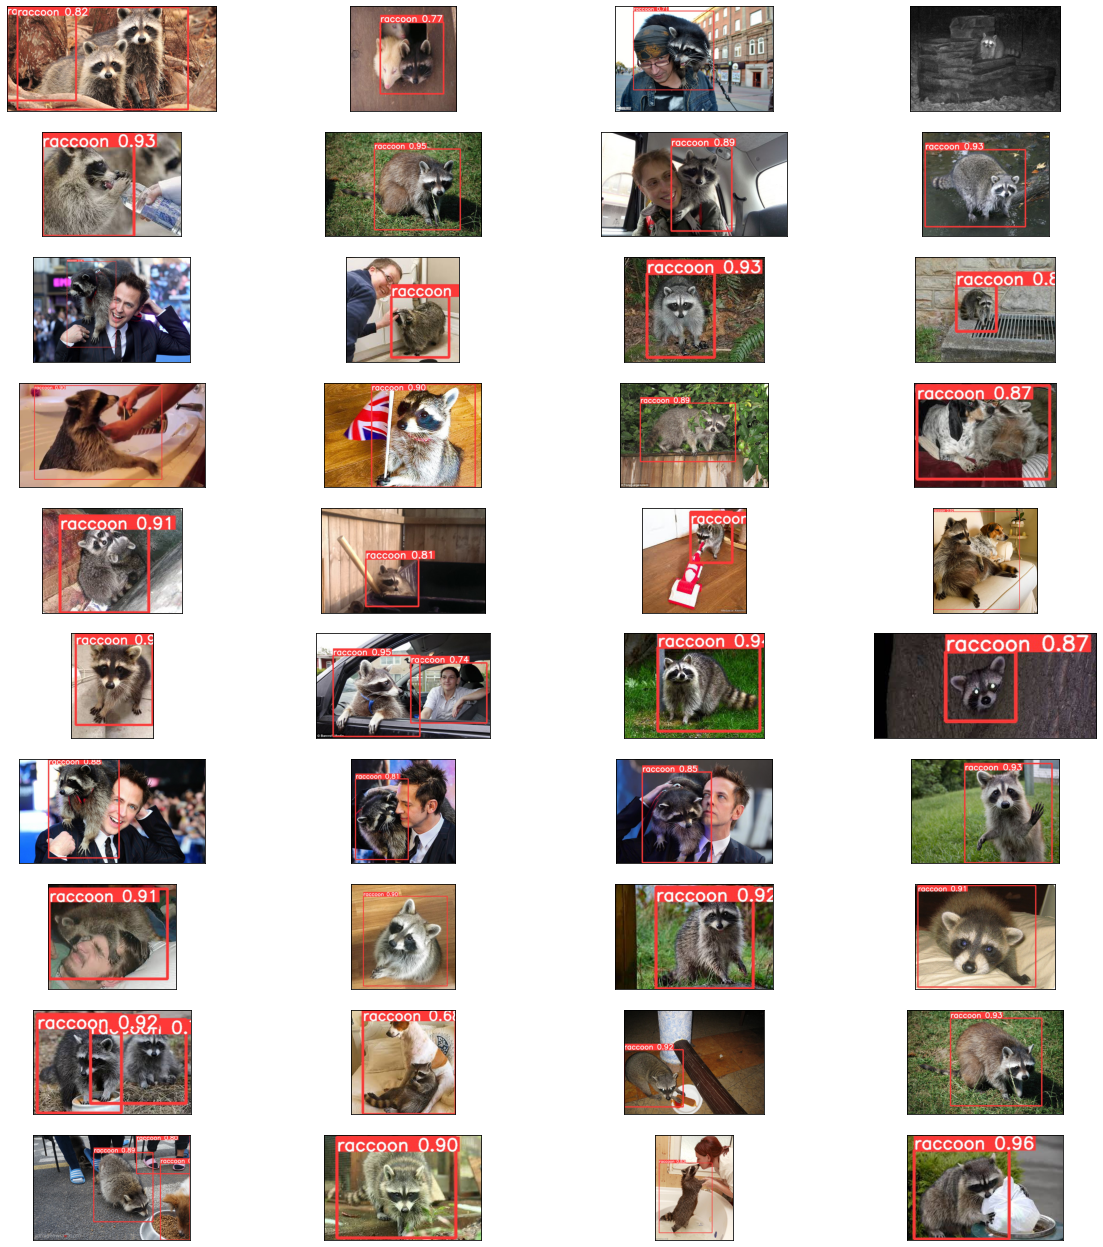

In [ ]:
detect_path = r'runs_penguins/detect_test'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)